In [2]:
import numpy as np
import scipy.stats as stats
import scipy.special as special
import pandas as pd
import chaospy as cp

%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import pair_plot as pplt

sns.set_style("ticks")#'whitegrid')#
#sns.set_context("talk")
sns.set_style({'axes.linewidth':0.5,
               'xtick.direction': u'in',
               'xtick.major.size': 1.,
               'xtick.minor.size': 0.5,
               'ytick.direction': u'in',               
               'ytick.major.size': 1.,
               'ytick.minor.size': 0.5})  


# Multivariate Normal

In [41]:
np.random.seed(0)
D = 4
mu_x = np.array([0,0,0,0])#10.*np.random.rand(D)
sigma_x= (0.5-np.random.rand(D,D))

'''
np.array([[ 1.0, 0.0, 0.5,-0.5],
                   [ 0.0, 1.0, 0.8,-0.8],
                   [ 0.5, 0.8, 1.0, 1.0],
                   [-0.5,-0.8, 1.0,1.0]])#
'''

mu = mu_x
C = np.dot(sigma_x.T,sigma_x)

dist_Q = cp.MvNormal(mu, C)
sample_inputs = dist_Q.sample(size=100,rule='H')
sample_inputs_full = dist_Q.sample(size=int(1e6),rule='H')

In [42]:
df = pd.DataFrame(columns=['x1','x2','x3','x4'],data=sample_inputs.T)
df_full = pd.DataFrame(columns=['x1','x2','x3','x4'],data=sample_inputs_full.T)

In [47]:
var_list = ['x1','x2','x3','x4']
var_labels = {'x1':'x1','x2':'x2','x3':'x3','x4':'x4'}
lims = [-3,3]
var_lims = {'x1':lims,'x2':lims,'x3':lims,'x4':lims}

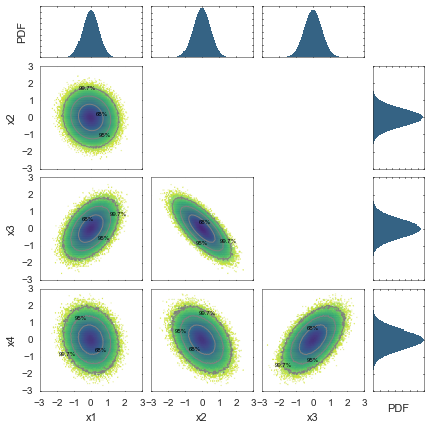

In [90]:
fig,ax= pplt.pair_plot(df_full, var_list=var_list, var_lims=var_lims, var_labels=var_labels, 
                       num_inputs=4, bins=100, #alpha=0.7, 
                       colors=None, opt='hexbin', figsize=[6, 6])
fig.savefig('Figures/Multivariate_Normal_example_sample.png',dpi=400)

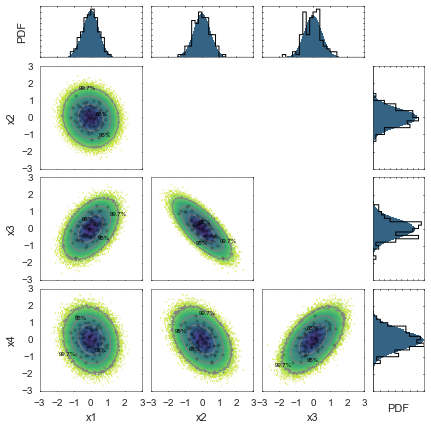

In [91]:
fig,ax= pplt.pair_plot(df_full, var_list=var_list, var_lims=var_lims, var_labels=var_labels, 
                       num_inputs=4, bins=100, #alpha=0.7, 
                       colors=None, opt='hexbin', figsize=[6, 6])
fig,ax= pplt.pair_plot(df, var_list=var_list, var_lims=var_lims, var_labels=var_labels, 
                       marker='+',num_inputs=4, bins=30, alpha=0.8, 
                       colors='black', opt='scatter', fig=fig,ax=ax, figsize=[6, 6])
#fig.savefig('Figures/Multivariate_Normal_example.pdf')
fig.savefig('Figures/Multivariate_Normal_example.png',dpi=400)

In [49]:
# Compute the correlation matrix
corr = df_full.corr()
corr

,x1,x2,x3,x4
x1,1.000000,-0.105219,0.455811,-0.155454
x2,-0.105219,1.000000,-0.746381,-0.383467
x3,0.455811,-0.746381,1.000000,0.544310
x4,-0.155454,-0.383467,0.544310,1.000000


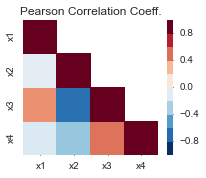

In [87]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(3, 2.5))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# Draw the heatmap using seaborn
sns.heatmap(corr, vmax=1, square=True, mask=mask, ax=ax, 
            cbar_kws={'boundaries':np.linspace(-1,1,11,endpoint=True),
                      'values':np.linspace(-1,1,10,endpoint=True)})
ax.set_title('Pearson Correlation Coeff.')
fig.tight_layout()
fig.savefig('Figures/Multivariate_Normal_example_corr.pdf')